In [2]:
import os, sys 

currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
gparentdir = os.path.dirname(parentdir)
ggparentdir = os.path.dirname(gparentdir)

sys.path.insert(0, '/'.join([gparentdir,'prototyping'])) 
sys.path.insert(0, '/'.join([parentdir])) 
sys.path.insert(0, '/'.join([gparentdir,'minions'])) 
sys.path.insert(0, '/'.join([gparentdir])) 
sys.path.insert(0, '/'.join([parentdir,'Functions','Procedures'])) 

from GigaMeshMinions import command_line_GigaMesh
from Functions.WorkFlow import run_workflow


import pandas as pd
import numpy as np
from Graph.GraphPlotting import ChaineOperatoire, GraphEvaluation

from Functions.EvaluateGraph import directed_edges_parameters, export_links,direct_edges_w_parameter,direct_edges_w_phase
from Classes.BasicClasses import NpEncoder
import networkx as nx
import json

import pandas as pd

from Functions.exportFiles.writeTxt import write_labels_txt_file,write_funvals_txt_file,write_feature_vectors_txt_file

In [3]:
# json_dicts = {4:{1:{'name': 'GMAO', "derived_from": "MEAS", 'class': 'GigaMesh', 'method': '', 'stage': 1, 'parameters': '', 'variables': '', 'add_labels' : False, 'processed': '_GMAO', 'metadata': ['']},
#                        2:{'name': 'GMCF', "derived_from": "GMAO", 'class': 'GigaMesh', 'method': 'gigamesh-clean', 'stage': 2, 'variables': {}, 'add_labels' : False, 'parameters': '-m "original, lithic"', 'processed': '_GMCF', 'metadata': ['mesh_polish']},
#                        3:{'name': 'MSII', "derived_from": "GMCF", 'class': '', 'method': '', 'stage': 3, 'variables': {'r': 1.0, 'n': 4, 'v': 256}, 'parameters': '-r 1.00 -n 4 -l 256', 'add_labels' : False, 'processed': '_r1.00_n4_v256.volume', 'metadata': ['info', 'normal', 'surface', 'volume']},
#                        4:{'name': 'CO-MSII-fv', "derived_from": "MSII",'class':'CO-MSII', 'method':'MSII_feature_vector', 'stage':4, 'parameters':'', 'add_labels' : True, 'add_links': True, 'variables':{'labelname':'_scar-labels', "graphname": "max", "diameter": 1.0, "parameter": "quality", "n_rad": 16,'preprocessed':''},'metadata': []}}}

path = "/home/linsel/Documents/PhD/Data/Cologne" 
folder = 'Cologne-test-knapping_202307'
# path = "/home/linsel/Documents/PhD/Data/Cologne" 
# folder = "Cologne_202402"


is_phase = True 
border_thickness = 7
radius_scale = 0.5
circumference_scale = 1

preprocessed,nodesname,labelname = '_r1.00_n4_v256.volume','positions.csv','_scar-labels.txt'

method = 'graph_direct_parameter'


json_dicts ={1:{3:{'name': 'MSII', "derived_from": "GMCF", 'class': '', 'method': '', 'stage': 3, 'variables': {'r': 1.0, 'n': 4, 'v': 256}, 'parameters': '-r 1.00 -n 4 -l 256', 'add_labels' : False, 'processed': '_r1.00_n4_v256.volume', 'metadata': ['info', 'normal', 'surface', 'volume']},
               4:{'name': 'GRAPH-3D', 
                    "derived_from": "MSII",
                    'class':'GRAPH', 
                    'method':'graph_direct_parameter', 
                    'stage':4, 'parameters':'', 
                    'add_labels' : True, 
                    'add_links': False, 
                    'metadata': [],
                    'variables':{'labelname':labelname,
                                 'nodesname':nodesname,
                                 'preprocessed':'',
                                 'is_phase':is_phase,
                                 'border_thickness':border_thickness,
                                 'radius_scale':radius_scale,
                                 'circumference':circumference_scale},
                     'labelname':labelname}}}

# json_dicts

In [53]:
for key,json_dict in json_dicts.items():

    run_workflow (path, folder, json_dict)

['GRAPH-3D', 'CO-Concavity', 'LINK', 'CO-MSII-fv', 'ANNO', 'MAT', 'MSII']
MSII
GRAPH-3D


In [7]:
import trimesh
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to save a view of the mesh
def save_view(mesh, azim, elev, filename, dpi=100):
    # Create a new figure with specified DPI
    fig = plt.figure(dpi=dpi)
    # Add a 3D subplot without a grid
    ax = fig.add_subplot(111, projection='3d', facecolor='w')
    # Set the view angle
    ax.view_init(azim=azim, elev=elev)
    # Remove grid
    ax.grid(False)
    # Set pane color to white
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    # Set to orthographic projection
    ax.set_proj_type('ortho')
    # Display the mesh
    mesh.show(ax=ax)
    # Save the figure to a file
    plt.axis('off')  # Hide the axes
    plt.savefig(f'{filename}_{dpi}dpi.png', bbox_inches='tight', pad_inches=0)
    # Close the figure to free memory
    plt.close(fig)

# Create a cylinder using trimesh
cylinder = trimesh.creation.cylinder(radius=1, height=2, sections=32)

# Adding color to the vertices
colors = np.random.uniform(low=0, high=1, size=(cylinder.vertices.shape[0], 4))
cylinder.visual.vertex_colors = colors

# Define the six views with azimuth and elevation angles
views = {
    'front': (0, 0),
    'back': (180, 0),
    'left': (90, 0),
    'right': (-90, 0),
    'top': (0, 90),
    'bottom': (0, -90)
}

# Set DPI for images
dpi = 150

# Loop through the views and save each to a file
for view_name, (azim, elev) in views.items():
    save_view(cylinder, azim, elev, view_name, dpi=dpi)


In [1]:
import os
# switch to "osmesa" or "egl" before loading pyrender
os.environ["PYOPENGL_PLATFORM"] = "osmesa"

import numpy as np
import pyrender
import trimesh
import matplotlib.pyplot as plt

# generate mesh
sphere = trimesh.creation.icosphere(subdivisions=4, radius=0.8)
sphere.vertices+=1e-2*np.random.randn(*sphere.vertices.shape)
mesh = pyrender.Mesh.from_trimesh(sphere, smooth=False)

# compose scene
scene = pyrender.Scene(ambient_light=[.1, .1, .3], bg_color=[0, 0, 0])
camera = pyrender.PerspectiveCamera( yfov=np.pi / 3.0)
light = pyrender.DirectionalLight(color=[1,1,1], intensity=2e3)

scene.add(mesh, pose=  np.eye(4))
scene.add(light, pose=  np.eye(4))

c = 2**-0.5
scene.add(camera, pose=[[ 1,  0,  0,  0],
                        [ 0,  c, -c, -2],
                        [ 0,  c,  c,  2],
                        [ 0,  0,  0,  1]])

# render scene
r = pyrender.OffscreenRenderer(512, 512)
color, _ = r.render(scene)

plt.figure(figsize=(8,8)), plt.imshow(color);

ImportError: ('Unable to load OpenGL library', 'OSMesa: cannot open shared object file: No such file or directory', 'OSMesa', None)

In [4]:
from GigaMeshMinions import command_line_GigaMesh
from Functions.WorkFlow import run_workflow

path = "/home/linsel/Documents/PhD/Data/Cologne" 
folder = 'Cologne_2022_ANNO'
folder = 'Cologne-test-knapping_202307'

# run_workflow(path, folder, json_dict)



# for key,json_dict in json_dicts.items():
#     # for json_dict.items():
#     for n, tool in workflow.items():
#     # json_dict['name']

    # run_workflow (path, folder, json_dict)

In [5]:
#  @timing
def graph_direct_parameter_procedure (obj,**kwargs):

    # LabelledMesh init
    path = kwargs ['path'] 
    id = kwargs ['id']
    preprocessed = kwargs ['preprocessed']
    labelfilepath = kwargs ['labelfilepath']
    is_phase = kwargs ['is_phase'] 
    radius_scale = kwargs ['radius_scale']   
    circumference = kwargs ['circumference'] 
    nodesname =  kwargs ['nodesname']  

    # Data import 
    obj.load_labelled_mesh(path,id,preprocessed,labelfilepath) 
    obj.extract_ridges()

    # get polylines
    obj.edges_to_polygraphs()
    obj.polygraphs_to_polylines()

    # create node coordinates
    obj.get_centroids()
    # obj.get_NNs()
    # obj.get_NNs()

    # prepare for creating MSII1D_Pline object 
    obj.create_normals_vertices()
    obj.create_dict_mesh_info()
    obj.prepare_polyline()

    # prepare for get ridges and for scar-ridge-graph model and leading to chaine-operatoire 
    obj.prep_ridges()
    obj.polineline_segmenting()
    obj.segment_to_graph()
    obj.create_undirected_model(radius_scale,circumference)

    

    obj.export_graphs_labels()

    # graph_export(obj.G_ridges,path,id,preprocessed,params['name'])
    
    edges = obj.G_ridges.edges 

    procedures = {True: direct_edges_w_phase,
                  False: direct_edges_w_parameter}

    func = procedures.get(is_phase)

    func (path,id,preprocessed,edges,params['values'],params['name'])

    graph_export(obj,**kwargs)


In [10]:
from Functions.Procedures.GraphEvaluationProcedures import graph_export

path = "/home/linsel/Documents/PhD/Data/Cologne/" 
# folder = 'Cologne_2022_ANNO'
# folder = 'Cologne-test-knapping_202307'

# path = "/home/linsel/Downloads" 
folder = "Cologne_202402"
nodesname = '_positions.csv'

preprocessed = '_GMCF_c'

for sub_f in os.listdir( '/'.join([path,folder,''])):
    if sub_f.endswith('LINKS'):
        subfolder = sub_f
        subfolder_path = '/'.join([path,folder,sub_f,''])

for file in os.listdir(subfolder_path):

    if file.endswith(nodesname):

        ind =  file.split('_')[0]

        if ind in  ['672','897','895','670-1','670-2','670','1424','893']:#
            continue

        labelfilepath = ''.join([path,folder,'/Cologne_202402_05_LABEL/',ind,preprocessed,'_scar-labels.txt'])


        df = pd.read_csv (''.join([subfolder_path,
                                ind,
                                '',#preprocessed,
                                nodesname]),
                        sep=",")

        values_dict = {row['gt_label']:row['phase'] for _, row in df.iterrows()}

        obj = GraphEvaluation ()

        params = {'name':'', 'values':values_dict}

        kwargs = {'path':subfolder_path,
                  'id':ind,
                  'preprocessed':preprocessed,
                  'labelfilepath':labelfilepath,
                  'nodesname':nodesname,
                  'params':params,
                  'is_phase':is_phase,
                  'border_thickness':border_thickness,
                  'radius_scale':radius_scale,
                  'circumference':circumference_scale}

        print('processing', ind, '...')

        graph_direct_parameter_procedure (obj,**kwargs)
        # except:
        #     print (ind,'failed!')

In [6]:
def merge_data_procedure (obj,**kwargs):

    path = kwargs ['path']
    folder = kwargs ['folder']
    endings  = kwargs['endings']
    skip  = kwargs['skip']
    
    meta_files = get_ply_metadata (path,folder,endings)

    for name,files in meta_files.items():

        extracted_data = extract_data_ply_metadata(folder,name,files)

        kwargs.update(extracted_data) 

        try:
            max_step =  [int(file_split.split('_')[-2]) for file in files for file_split in file.split('/') if file_split.startswith(''.join([folder, '_'])) ][0]

        except:
            
            print (name)
            continue


        # files_folders = {file_split.split('_')[-1]:[f for f in files for f_split in f.split('/') if f_split.split('_')[-1] == file_split.split('_')[-1]] for file in files for file_split in file.split('/') if file_split.startswith(''.join([folder, '_']))}
        file_folders = list({file_split.split('_')[-1] for file in files for file_split in file.split('/') if file_split.startswith(''.join([folder, '_']))})

        new_folder = '_'.join([folder,'{:0>2}'.format(max_step+1), 'MAT'])

        if not new_folder in os.listdir('/'.join([path,folder])):

            os.mkdir('/'.join([path,folder,new_folder]))

        df = merge_data (path,folder,new_folder,name,file_folders,files,skip) 

        return df,files

path = "/home/linsel/Documents/PhD/Data/Cologne" 
folder = 'Cologne-test-knapping_202307'

single_vec_list = ['inside-concavity-r{}.txt'.format(str(i)) for i in range(1,17)]

single_vec_list_2 = ['outside-mean-angle-r{}.txt'.format(str(i)) for i in range(1,17)]


skip = {'ang-vec-n16.txt':5,'dst-vec-n16.txt':5,'v256.volume.mat':15}

skip.update({sv:5 for sv in single_vec_list})
skip.update({sv:5 for sv in single_vec_list_2})

endings = [ 'ang-vec-n16.txt','dst-vec-n16.txt','links.csv']

[endings.append(i) for i in single_vec_list]
[endings.append(i) for i in single_vec_list_2]

kwargs = {'path':path,'folder':folder,'skip':skip,'endings':endings}
obj = GraphEvaluation ()

print(endings)

# create_directory_dictionary(path)
merge_data_procedure(obj,**kwargs)

# merge_data_procedure

['ang-vec-n16.txt', 'dst-vec-n16.txt', 'links.csv', 'inside-concavity-r1.txt', 'inside-concavity-r2.txt', 'inside-concavity-r3.txt', 'inside-concavity-r4.txt', 'inside-concavity-r5.txt', 'inside-concavity-r6.txt', 'inside-concavity-r7.txt', 'inside-concavity-r8.txt', 'inside-concavity-r9.txt', 'inside-concavity-r10.txt', 'inside-concavity-r11.txt', 'inside-concavity-r12.txt', 'inside-concavity-r13.txt', 'inside-concavity-r14.txt', 'inside-concavity-r15.txt', 'inside-concavity-r16.txt', 'outside-mean-angle-r1.txt', 'outside-mean-angle-r2.txt', 'outside-mean-angle-r3.txt', 'outside-mean-angle-r4.txt', 'outside-mean-angle-r5.txt', 'outside-mean-angle-r6.txt', 'outside-mean-angle-r7.txt', 'outside-mean-angle-r8.txt', 'outside-mean-angle-r9.txt', 'outside-mean-angle-r10.txt', 'outside-mean-angle-r11.txt', 'outside-mean-angle-r12.txt', 'outside-mean-angle-r13.txt', 'outside-mean-angle-r14.txt', 'outside-mean-angle-r15.txt', 'outside-mean-angle-r16.txt']


NameError: name 'get_ply_metadata' is not defined

In [7]:
from FolderMinions import *

import json

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def apply_pca_and_export(path,folder,new_folder,name,file_folders,df):
    """
    Apply PCA transformation to the given DataFrame and export the PCA values to a CSV file.
    Also, save the metadata (explained variance) in a separate JSON file.

    Parameters:0.46153846153846156
    - pd.DataFrame: pandas DataFrame, the input data for PCA.
    - csv_file_path: str, the path to save the CSV file with PCA values.
    - json_file_path: str, the path to save the JSON file with metadata.path,folder,new_folder,name,file_folders
    """

    csv_file_path = '/'.join([path,folder,
                                    new_folder,
                                    '_'.join ([name,
                                                '_'.join(file_folders),
                                                'fv_pca.mat']) 
                                    ])
    json_file_path = '/'.join([path,folder,
                                    new_folder,
                                    '_'.join ([name,
                                                '_'.join(file_folders),
                                                'fv_pca.json']) 
                                    ])


    # Scaling the data
    scaler = StandardScaler()
    scaled_df = scaler.fit_transform(df)

    # Applying PCA
    pca = PCA()
    pca_transformed = pca.fit_transform(scaled_df)

    # Exporting PCA values to CSV
    df = pd.DataFrame(pca_transformed, index=df.index)
    df.to_csv(csv_file_path, sep=' ', index=True, header=False)
    
    # Saving metadata (explained variance) in a JSON file
    metadata = {
        'explained_variance_ratio': pca.explained_variance_ratio_.tolist(),
        'explained_variance': pca.explained_variance_.tolist()
    }
    with open(json_file_path, 'w') as json_file:
        json.dump(metadata, json_file)

def extract_data_ply_metadata(folder,name,files):

    try:
        max_step =  [int(file_split.split('_')[-2]) for file in files for file_split in file.split('/') if file_split.startswith(''.join([folder, '_'])) and file_split.split('_')[-1] == 'LINK' ][0]

    except:
        
        print (name)
        return {}

    file_folders = list({file_split.split('_')[-1] for file in files for file_split in file.split('/') if file_split.startswith(''.join([folder, '_']))})

    new_folder = '_'.join([folder,'{:0>2}'.format(max_step+1), 'MAT'])

    extracted_data = {'file_folders':file_folders,
                      'new_folder':new_folder}

    return extracted_data

def label_import (label_path):

    # import label and create dictionary 
    df_label = pd.read_csv(label_path,skiprows=5,header=None,sep=' ',names=['a','b'],dtype=int)  # import txt segmentation 

    dict_label = dict(zip(df_label.a, df_label.b))

    return dict_label



# CAA Prep:

In [8]:
np.set_printoptions(suppress=True)
from Functions.EvaluateGraph import evaluate_directed_edges

In [9]:
def get_ridge_pairs(neighbouring_labels_set,mean_segments_funv):

    ridges_pairs = {}

    for edge in neighbouring_labels_set:
        if (edge[1],edge[0]) not in ridges_pairs:

            try:

                difference = mean_segments_funv[(edge[0],edge[1])] - mean_segments_funv[(edge[1],edge[0])]

                ridges_pairs [(edge[0],edge[1])] = {'paired_scar':(edge[1],edge[0]),
                                                    'bigger_smaller': np.sign(difference), 
                                                    'difference' : np.absolute(difference)}
        

            except:
                continue

    return ridges_pairs

def get_directed_edges(ridge_pairs:dict):

    """
    Determines direction of edges based on differences between function values.

    Args:
        ridges_pairs (dict): dictionary containing edges as tuples (keys) and nested dictionary derived from mean segment values with 3 keys:
                                - 'paired_scar' :   reversed ordered edge (tuple)
                                - 'bigger_smaller': sign of difference. 
                                - 'difference':     difference between func values between vertices belonging to edge[0] and edge[1]. 
                                                  eval_edge_direction, accuracyin ridge_pairs.items() 
                                        if values['bigger_smaller'] == -1.0] + 
                                [(values['paired_scar'],values['difference'])  
                                    for values in ridge_pairs.values()
                                        if values['bigger_smaller'] == 1.0])
    """
    directed_edges = {( r1 if values['bigger_smaller'] == -1.0 else values['paired_scar']):values['difference'] 
                            for r1,values in ridge_pairs.items()}
    return directed_edges

from Functions.EssentialEdgesFunctions import get_manual_edges,export_links,export_links_eval

# def eval_edges


#             edges_turned = {(edge[1],edge[0]) for edge in edges}

#             evaluate_directed_edges(DiG_ridges_edges [n],edges_turned)

In [10]:
def merge_data_simple (files_paths): 

    for file_path in files_paths:
            
        data = np.loadtxt(file_path, skiprows=5,delimiter=' ')      

        data[:, 1:] = data[:, 1:].astype(np.float32)

        if 'df1' in locals():

            df2 = pd.DataFrame(data[:, 1:], index=[int(dat) for dat in data[:, 0]])

            common_indices = df2.index.intersection(df1.index)


            df1 = df1.loc[common_indices]
            intersection_df2 = df2.loc[common_indices]

            df1 = pd.concat([df1, intersection_df2], axis=1) 

        else:

            df1 = pd.DataFrame(data[:, 1:], index=[int(dat) for dat in data[:, 0]])

    return df1

def get_min (values):
    return values.index(min(values))

def get_max (values):
    return values.index(max(values))

In [19]:
labelname = '_GMOCF_r1.00_n4_v256.volume_updated-labels-bt7.txt'
graphname = 'normal'
diameter = 10
n_rad = 17    
radius_scale = 0.5
circumference_scale = 1


preprocessed = '_GMOCF_r1.00_n4_v256.volume'
exp_path = 'exp_path/'
ind = str(207)
# subfolder_path = "/home/linsel/Documents/PhD/Data/Graphs/Fumane/CO/"#{}/".format(id)
ending = '.txt'
border_thickness = 7

single_vec_list = ['CO-concavity-r{}.txt'.format(str(i)) for i in range(1,17)]
single_vec_list = ['ang-vec-n16.txt']
single_vec_list = ['dst-vec-n16.txt']

kwargs.update({'border_thickness':border_thickness})

# single_vec_list = ['CO-angle-r{}.txt'.format(str(i)) for i in range(1,17)]
# [single_vec_list.append('CO-angle-r{}.txt'.format(str(i))) for i in range(1,17)]

# [single_vec_list.append('CO-angle-r{}.txt'.format(str(i))) for i in range(1,17)]


# single_vec_list = ['CO-concavity-r{}.txt'.format(str(i)) for i in range(1,17)]

# skip = {'ang-vec-n16.txt':5,'dst-vec-n16.txt':5,'v256.volume.mat':15}

# skip.update({sv:5 for sv in single_vec_list})

# endings = single_vec_list #[ 'ang-vec-n16.txt','dst-vec-n16.txt','links.csv']

print(subfolder_path)

ind = str(207)
subfolder_path = "/home/linsel/Documents/PhD/Data/Graphs/Fumane/CO/{}/CO/".format(ind)

for file in os.listdir(subfolder_path):

    if file.endswith('graph.json'):

        acc_edges = {'E':{},
                     'E_rev':{},
                     'E_simp':{},
                     'E_simp_rev':{}}

        # ind =  file.split('_')[0]

        simp_edges = get_manual_edges(subfolder_path, ''.join([ind,'_simp']))

        edges = get_manual_edges(subfolder_path, ind)

        if simp_edges == None:
            break

        G_json = ''.join ([subfolder_path,file])

        with open(G_json) as handle:
            G_edges = json.loads(handle.read())

        file_paths = list({subfolder_path + f for f in os.listdir(subfolder_path) for end in single_vec_list if f.endswith(end)})

        df = merge_data_simple(file_paths)
        df.columns = [n+1 for n,_ in enumerate(df.columns)]

        # edge_mean = {tuple(vals['edge']):{c:np.mean ([df[c][n] if n in df[c].index else 0 for n in vals['nodes'] ]) for c in df.columns[1:]} for k,vals in G_edges.items()}
        edge_mean = {k:{c:np.mean ([df[c][n] if n in df[c].index else 0 for n in vals['nodes']], dtype = np.float32) for c in df.columns[1:]} for k,vals in G_edges.items()}

        border_path = ''.join([subfolder_path,file[:-len('graph.json')],'updated-labels-bt{}.txt'.format(kwargs['border_thickness'])])       
        
        boarders = label_import(border_path)

        for n,c in enumerate(df.columns[1:]):

            edge_mean_boarder = {k:np.format_float_positional(edge_mean[str(val)][c]) for k,val in boarders.items()}   

            edge_mean_vals_path =  ''.join([subfolder_path ,file [:-5]]) 

            write_funvals_txt_file (edge_mean_boarder, edge_mean_vals_path, str(n) + '.txt')   
 
            edge_mean_vals = {tuple(G_edges[str(val)] ['edge']):np.float32(np.format_float_positional(edge_mean[str(val)][c])) for k,val in boarders.items()}   

            edge_set = set(edge_mean_vals.keys())

            ridge_pairs = get_ridge_pairs(edge_set,edge_mean_vals)

            directed_edges_dict = get_directed_edges(ridge_pairs)


            directed_edges = {edge for edge in directed_edges_dict.keys() if edge in edges or  (edge[1],edge[0]) in edges}
            directed_edges_rev = {(k[1],k[0]) for k in directed_edges}
            
            directed_edges_simp = {edge for edge in directed_edges if edge in simp_edges or  (edge[1],edge[0]) in simp_edges}     
            directed_edges_simp_rev = {(k[1],k[0]) for k in directed_edges_simp}       
            
            acc_edges ['E'].update({n:evaluate_directed_edges(directed_edges,edges)})
            # print("Edge:",acc_edges ['E'][n][1])

            acc_edges ['E_rev'].update({n:evaluate_directed_edges(directed_edges_rev,edges)})
            # print("Edge Rev:",acc_edges ['E_rev'][n][1])           

            acc_edges ['E_simp'].update({n:evaluate_directed_edges(directed_edges_simp,simp_edges)}) 
            # print("Edge Simp:",acc_edges['E_simp'][n][1])

            acc_edges ['E_simp_rev'].update({n:evaluate_directed_edges(directed_edges_simp_rev,simp_edges)})
            # print("Edge Simp Rev:",acc_edges['E_simp_rev'][n][1])            

        print_accuracy_edges
                    
def print_accuracy_edges (acc_edges):
    print('max')
    print(np.max([val [1] for val in acc_edges ['E'].values()]))
    print(np.max([val [1] for val in acc_edges ['E_rev'].values()]))
    print(np.max([val [1] for val in acc_edges ['E_simp'].values()]))
    print(np.max([val [1] for val in acc_edges ['E_simp_rev'].values()])) 
    print('max_id')
    print(get_max([val [1] for val in acc_edges ['E'].values()]))
    print(get_max([val [1] for val in acc_edges ['E_rev'].values()]))
    print(get_max([val [1] for val in acc_edges ['E_simp'].values()]))
    print(get_max([val [1] for val in acc_edges ['E_simp_rev'].values()]))               
    print('mean')
    print(np.mean([val [1] for val in acc_edges ['E'].values()]))
    print(np.mean([val [1] for val in acc_edges ['E_rev'].values()]))
    print(np.mean([val [1] for val in acc_edges ['E_simp'].values()]))
    print(np.mean([val [1] for val in acc_edges ['E_simp_rev'].values()])) 



/home/linsel/Documents/PhD/Data/Graphs/Fumane/CO/207/CO/
Has edges file
Has edges file
['/home/linsel/Documents/PhD/Data/Graphs/Fumane/CO/207/CO/207_dst-vec-n16.txt']
Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], dtype='int64')


/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


max
0.717391304347826
0.43478260869565216
0.8
0.4
max_id
11
0
12
1
mean
0.6507246376811594
0.3492753623188406
0.6777777777777778
0.32222222222222224


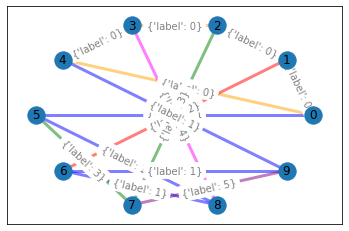

In [1]:
# 20106911 Minjae Park
# Finding an Ear decomposition of 2(-edge)-connected graph

import networkx as nx
import matplotlib.pyplot as plt

colorList = ["orange", "blue", "red", "green", "magenta", "purple", "yellow", "black"]
global count
count=0

'''
Input Graph
'''
# Complete Graph
#G=nx.complete_graph(6)

'''
# Non 2-connected (but 2-edge-connected) Graph
G=nx.Graph()
G.add_edge(0,1)
G.add_edge(1,2)
G.add_edge(2,0)
G.add_edge(2,3)
G.add_edge(3,4)
G.add_edge(4,5)
G.add_edge(5,3)
G.add_edge(4,2)
'''

# Petersen Graph
G=nx.petersen_graph()

'''
Testing 2-edge-connectivity
'''

for e in G.edges():
    H= G.copy()# nx.Graph(G)
    G.remove_edge(*e)
    if not nx.is_connected(G):
        raise SystemExit("G is not 2-edge-connected. This algorithm is not valid.")
    G=H

'''
Testing 2-connectivity
'''

for v in G.nodes() :
    H=G.copy()
    H.remove_node(v)
    if not nx.is_connected(H):
        print ("G is not 2-connected. The result is not an open ear decomposition.")


'''
Algorithm for Finding an Ear Decomposition
'''
def makeSpanningTree(G,root):
    T=nx.Graph()
    T.add_node(root)
    T.nodes[root]['dfsnum']=len(T.nodes())
    makeSpanningTreeDFS(G,T,root)
    return T

def makeSpanningTreeDFS(G,T,current):
    if not 'child' in T.nodes[current]:
        T.nodes[current]['child']=[]
    for neighbor in G.neighbors(current):
        if not neighbor in T.nodes():
            T.add_node(neighbor)
            T.add_edge(current,neighbor)
            T.nodes[neighbor]['dfsnum']=len(T.nodes())
            T.nodes[neighbor]['parent']=current
            T.nodes[current]['child'].append(neighbor)
            makeSpanningTreeDFS(G,T,neighbor)

def assignNonTreeEdgeLabel(G,T,current):
    global count
    subrootdfsnum=T.nodes(data=True)[current]['dfsnum']
    for node,nodeattr in T.nodes(data=True):
        if nodeattr['dfsnum']>subrootdfsnum:
            if ((current,node) in G.edges() or (node,current) in G.edges()) and not ((current,node) in T.edges() or (node,current) in T.edges()):
                G[current][node]['label']=count
                count+=1
    for neighbor in T.nodes(data=True)[current]['child']:
        assignNonTreeEdgeLabel(G,T,neighbor)

def assignTreeEdgeLabel(G,T,current):
    if not T.nodes(data=True)[current]['child']:
        label=[]
        for neighbor in G.neighbors(current):
            if 'label' in G[current][neighbor]:
                label.append(G[current][neighbor]['label'])
        if 'parent' in T.nodes[current]:
            parent=T.nodes[current]['parent']
            G[current][parent]['label']=min(label)
    else:
        for neighbor in T.nodes(data=True)[current]['child']:
            if not 'label' in T.nodes[neighbor]:
                assignTreeEdgeLabel(G,T,neighbor)
        if 'parent' in T.nodes[current]:
            parent=T.nodes[current]['parent']
            label=[]
            for neighbor in G.neighbors(current):
                if 'label' in G[current][neighbor]:
                    label.append(G[current][neighbor]['label'])
            G[current][parent]['label']=min(label)


T=makeSpanningTree(G,0)
assignNonTreeEdgeLabel(G,T,0)
assignTreeEdgeLabel(G,T,0)

'''
Output
'''
pos=nx.circular_layout(G)
ear_list=[[] for i in range(count+1)]
for (x,y) in G.edges():
    ear=G[x][y]['label']
    ear_list[ear].append((x,y))
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_labels(G,pos)
for i in range(len(ear_list)):
    nx.draw_networkx_edges(G,pos,edgelist=ear_list[i],edge_color=colorList[i%len(colorList)],alpha=0.5,width=3)
nx.draw_networkx_edge_labels(G,pos,alpha=0.5)

plt.show()

In [2]:
ear_list

[[(0, 1), (0, 4), (1, 2), (2, 3), (3, 4)],
 [(0, 5), (4, 9), (5, 8), (6, 8), (6, 9)],
 [(1, 6)],
 [(2, 7), (5, 7)],
 [(3, 8)],
 [(7, 9)],
 []]

In [ ]:


# Re-importing necessary libraries and redefining graph, positions, and color adjustments with alpha change
import matplotlib.pyplot as plt
import networkx as nx
import pygraphviz as pgv
from networkx.drawing.nx_agraph import graphviz_layout
import numpy as np

def render_G_vertical (file_path,G,N_size, E_size):

    # Calculate node indegrees and heights for color mapping
    indegree_map = dict(G.in_degree())
    min_indegree = min(indegree_map.values())
    max_indegree = max(indegree_map.values())
    heights = {node: 1 - (indegree_map[node] - min_indegree) / (max_indegree - min_indegree) for node in G.nodes()}

    # Define node colors with adjusted alpha
    colors = [plt.cm.Blues(heights[node]) if indegree_map[node] <= (max_indegree / 2) else plt.cm.Greens(heights[node]) for node in G.nodes()]
    adjusted_colors = [(*color[:3], 0.5) for color in colors]

    # Convert to AGraph and use Graphviz for layout
    A = nx.nx_agraph.to_agraph(G)
    A.layout(prog='dot')
    pos = graphviz_layout(G, prog='dot')

    # Drawing the graph with adjusted alpha values for node colors
    plt.figure(figsize=(10, 6))
    nodes = nx.draw_networkx_nodes(G, pos, node_color=adjusted_colors, cmap=plt.cm.Blues, node_size=N_size)
    edges = nx.draw_networkx_edges(G, pos, edge_color=[adjusted_colors[edge[0]-1] for edge in G.edges()], arrows=True)
    nx.draw_networkx_labels(G, pos)

    plt.axis('off')
    plt.show()

    plt.save('{}.png'.format(file_path))


def write_dictionary_w_indent_json (file_path,dictionary,indent):  

    # Convert the dictionary to a JSON string
    json_data = json.dumps(dictionary, indent=indent)

    # Save the JSON string to a file
    with open(file_path, 'w') as f:
        f.write(json_data)

# Create a sample directed graph
G = nx.DiGraph()
edges = [(1, 2), (1, 3), (2, 4), (2, 5), (3, 6), (4, 7), (5, 7), (6, 7)]
G.add_edges_from(edges)
render_G_vertical(G)
# graph_export(obj,**kwargs)
    
    # segment_label_dict_r1 = {nei:s_id for s_id, segment in self.segments_dict.items() for node in segment ['nodes'] for nei in self.ridge_neighbour_shared_label[node]}


    # segment_neighbours_r2 = {nei: [n for n in self.vertex_neighbors_dict[nei]]
    #                             for nei in segment_label_dict_r1.keys()}

    # segment_label_dict_r2 = {n:segment_label_dict_r1[nei] for nei,ns in segment_neighbours_r2.items() for n in ns}

    # segment_neighbours_r3 = {nei: [n for n in self.vertex_neighbors_dict[nei]]
    #                             for nei in segment_label_dict_r2.keys()}

    # segment_label_dict_r3 = {n:segment_label_dict_r2[nei] for nei,ns in segment_neighbours_r3.items() for n in ns}

    # segment_neighbours_r4 = {nei: [n for n in self.vertex_neighbors_dict[nei]]
    #                             for nei in segment_label_dict_r3.keys()}

    # segment_label_dict_r4 = {n:segment_label_dict_r3[nei] for nei,ns in segment_neighbours_r4.items() for n in ns}


    # segment_label_dict.update(segment_label_dict_r1)
    # segment_label_dict.update(segment_label_dict_r2)
    # segment_label_dict.update(segment_label_dict_r3)
    # segment_label_dict.update(segment_label_dict_r4)




    # print([vals ['length'] for vals in self.segments_dict.values()])

    # print([vals['nodes'] for vals in data()])


# graph_export(obj,**kwargs)

Polyline  

- distance

max
0.717391304347826
0.43478260869565216
0.8
0.4
max_id
11
0
12
1
mean
0.6507246376811594
0.3492753623188406
0.6777777777777778
0.32222222222222224

Parameter   & Original & Simplified\\
\hline
Mean   & 65.1\% & \textbf{67.8\%}\\
Max    & 71.7\% & \textbf{80}\%\\


- angle

max
0.5217391304347826
0.6521739130434783
0.6666666666666666
0.5666666666666667
max_id
1
13
1
0
mean
0.4405797101449275
0.5594202898550724
0.5333333333333333
0.4666666666666666

Parameter   & Original & Simplified\\
\hline
Mean   & \textbf{55.9\%} & 53.3\%\\
Max    & 65.2\% & \textbf{66.7}\%\\


#########################

Conc

max:

0.7391304347826086
0.34782608695652173
0.8333333333333334
0.3
0
12
0
12

mean

0.7217391304347825
0.2782608695652174
0.8133333333333334
0.18666666666666662

#########################
Angle 

max

0.5434782608695652
0.6521739130434783
0.6
0.7666666666666667
0
5
4
14

mean

0.48405797101449277
0.5159420289855072
0.4822222222222223
0.5177777777777777

# CAA Prep End

In [ ]:
for sub_f in os.listdir( '/'.join([path,folder,''])):
    if sub_f.endswith('GRAPH-3D'):
        subfolder_path = '/'.join([path,folder,sub_f,''])
    if sub_f.endswith('LINK'):
        link_ply_path = '/'.join([path,folder,sub_f,''])



for file in os.listdir(subfolder_path):

    if file.endswith('graph.json'):

        ind =  file.split('_')[0]
        G_json = ''.join ([subfolder_path,file])

        with open(G_json) as handle:
            G_edges = json.loads(handle.read())


        kwargs = {'path':path,'folder':folder,'skip':skip,'endings':endings, 'border_thickness':border_thickness}

        df = merge_data_procedure(obj,**kwargs)

        print(G_edges.keys())

        # edge_mean = {tuple(vals['edge']):{c:np.mean ([df[c][n] if n in df[c].index else 0 for n in vals['nodes'] ]) for c in df.columns[1:]} for k,vals in G_edges.items()}
        edge_mean = {k:{c:np.mean ([df[c][n] if n in df[c].index else 0 for n in vals['nodes'] ]) for c in df.columns[1:]} for k,vals in G_edges.items()}

        border_path = ''.join([subfolder_path,file[:-len('graph.json')],'updated-labels-bt{}.txt'.format(kwargs['border_thickness'])])       
        
        boarders = label_import(border_path)

        for c in df.columns[1:]:

            edge_mean_vals = {k:edge_mean[str(val)][c] for k,val in boarders.items()}     
            # edge_mean_vals = {n:edge_mean[tuple(vals['edge'])][c] for k,vals in G_edges.items() for n in vals['nodes'] }                 
            
            ending = '-'.join(['-'.join([end [:-4] for end in endings]),str(c)])

            edge_mean_vals_path =  ''.join([subfolder_path ,file [:-5]])
            
            write_funvals_txt_file (edge_mean_vals, edge_mean_vals_path, ending + '.txt')

        # # Update the segment_label_dict with neighbors up to the set up border_thickness levels deep
        # obj.segment_label_dict = update_segment_label_dict(obj,segment_label_dict, border_thickness)

        # segment_label = ''.join([path,id,'_'.join([preprocessed,'updated-labels-bt{}'.format(str(border_thickness))])])

        # write_labels_txt_file (obj.segment_label_dict, segment_label)

        # print(edge_label.values())
            


In [25]:

for file in os.listdir(subfolder_path):

    if file.endswith('nodes.csv'):

        ind =  file.split('_')[0]
        edge_file = ''.join ([subfolder_path,
                      ind,
                      '_graph.json'])

        with open(edge_file) as handle:
            edge_labels = json.loads(handle.read())

        edge_connected = {tuple(values['edge']): {int(v) for v,vals in edge_labels.items() if vals['edge'] == values['edge'] } for values in edge_labels.values()}
        

        print(edge_labels)

FileNotFoundError: [Errno 2] No such file or directory: '/home/linsel/Documents/PhD/Data/Cologne/Cologne-test-knapping_202307/Cologne-test-knapping_202307_04_LINK/TK-008_graph.json'

In [2]:
from Functions.Procedures.GraphEvaluationProcedures import graph_direct_parameter_procedure,graph_export,graph_undirected_procedure
id,preprocessed,ext,labelname = '1241.2','_GMOCF_r1.50_n4_v256.volume','_nodes.csv','_GMOCF_r1.50_n4_v256.volume_scar-labels'

path = "/home/linsel/Documents/PhD/Data/Cologne" 
path = "/home/linsel/Documents/PhD/Data/Robertinum/"
folder = "1241.2"#'Cologne_test_knapping_202307'

subfolder_path = '/'.join([path,folder,''])

is_phase = True 
border_thickness = 3
radius_scale = 0.5
circumference_scale = 1

obj = GraphEvaluation ()

# df = pd.read_csv (''.join([subfolder_path,
#                                     id,
#                                     preprocessed,
#                                     ext]),
#                             sep=","
#                         )


# values_dict = {row['gt_label']:row['phase'] for _, row in df.iterrows()}

# params = {'name':'', 'values':values_dict}

# for subfolder in os.listdir( '/'.join([path,folder,''])):
#     if subfolder.endswith('LINK'):
#         subfolder_path = '/'.join([path,folder,subfolder,''])

kwargs = {  'path':subfolder_path,
            'id':id,
            'preprocessed':preprocessed,
            'labelname':labelname,
            # 'params':params,
            'is_phase':is_phase,
            'border_thickness':border_thickness,
            'radius_scale': radius_scale,
            'circumference':circumference_scale}

# obj = graph_direct_parameter_procedure (obj,**kwargs)

graph_undirected_procedure (obj,**kwargs)
graph_export (obj,**kwargs)

In [56]:
# def update_segment_label_dict(obj, current_dict, depth=4):

#     if depth == 0:
#         return current_dict
    
#     # Generate the next level of neighbors and their associated segment IDs
#     segment_neighbours = {
#         nei: [n for n in obj.vertex_neighbors_dict[nei]]
#         for nei in current_dict.keys()
#     }

#     segment_label_dict_next = {
#         n: current_dict[nei] for nei, ns in segment_neighbours.items() for n in ns
#     }
    
#     # Update the original dictionary with the new associations
#     current_dict.update(segment_label_dict_next)
    
#     # Recur to process the next level of neighbors
#     return update_segment_label_dict(obj,segment_label_dict_next, depth - 1)


# # @timing
# def graph_direct_parameter_procedure (obj,**kwargs):

#     # LabelledMesh init
#     path = kwargs ['path'] 
#     id = kwargs ['id']
#     preprocessed = kwargs ['preprocessed']
#     labelname = kwargs ['labelname']
#     params = kwargs ['params'] 
#     is_phase = kwargs ['is_phase'] 
#     radius_scale = kwargs ['radius_scale']   
#     circumference = kwargs ['circumference'] 

#     # Data import 
#     obj.load_labelled_mesh(path,id,preprocessed,labelname) 
#     obj.extract_ridges()

#     # get polylines
#     obj.edges_to_polygraphs()
#     obj.polygraphs_to_polylines()

#     # create node coordinates
#     obj.get_centroids()
#     # obj.get_NNs()
#     # obj.get_NNs()

#     # prepare for creating MSII1D_Pline object 
#     obj.create_normals_vertices()
#     obj.create_dict_mesh_info()
#     obj.prepare_polyline()

#     # prepare for get ridges and for scar-ridge-graph model and leading to chaine-operatoire 
#     obj.prep_ridges()
#     obj.polineline_segmenting()
#     obj.segment_to_graph()
#     obj.create_undirected_model(radius_scale,circumference)

    

#     obj.export_graphs_labels()

#     # graph_export(obj.G_ridges,path,id,preprocessed,params['name'])
    
#     edges = obj.G_ridges.edges 

#     procedures = {True: direct_edges_w_phase,
#                   False: direct_edges_w_parameter}

#     func = procedures.get(is_phase)

#     func (path,id,preprocessed,edges,params['values'],params['name'])

#     graph_export(obj,**kwargs)


path = "/home/linsel/Documents/PhD/Data/Cologne" 
folder = 'Cologne-test-knapping_202307'

id,preprocessed,ext,labelname = 'TK-005','_GMOCF_r1.00_n4_v256.volume','_nodes.csv','_GMOCF_r1.00_n4_v256.volume_scar-labels'


is_phase = True 

subfolder_path = '/'.join([path,folder,'Cologne-test-knapping_202307_04_LINK',''])

# df = pd.read_csv (''.join([subfolder_path,
#                                     id,
#                                     preprocessed,
#                                     ext]),
#                             sep=","
#                         )


obj = GraphEvaluation ()

values_dict = {row['gt_label']:row['phase'] for _, row in df.iterrows()}

params = {'name':'', 'values':values_dict}

border_thickness = 7
radius_scale = 0.5
circumference_scale = 1

kwargs = {  'path':subfolder_path,
            'id':id,
            'preprocessed':preprocessed,
            'labelname':labelname,
            'params':params,
            'is_phase':is_phase,
            'border_thickness':border_thickness,
            'radius_scale': radius_scale,
            'circumference':circumference_scale}

# obj = graph_direct_parameter_procedure (obj,**kwargs)



for file in os.listdir(subfolder_path):

    if file.endswith('nodes.csv'):
        # try:

            id =  file.split('_')[0]


            df = pd.read_csv (''.join([subfolder_path,
                                    id,
                                    preprocessed,
                                    ext]),
                            sep=","
                        )

            values_dict = {row['gt_label']:row['phase'] for _, row in df.iterrows()}

            obj = GraphEvaluation ()

            params = {'name':'', 'values':values_dict}

            kwargs = {'path':subfolder_path,
                        'id':id,
                        'preprocessed':preprocessed,
                        'labelname':labelname,
                        'params':params,
                        'is_phase':is_phase,
                        'border_thickness':border_thickness,
                        'radius_scale': radius_scale,
                        'circumference':circumference_scale}

            # graph_direct_parameter_procedure (obj,**kwargs)

        # except: 
        #     print ("Something went wrong while calculating {}".format(file))
        #     continue

# run_workflow (path, folder, json_dict)

In [ ]:
from Functions.exportFiles.writeTxt import write_labels_txt_file

def graph_export (self,**kwargs):

    # LabelledMesh init
    path = kwargs ['path'] 
    id = kwargs ['id']
    preprocessed = kwargs ['preprocessed']
    labelname = kwargs ['labelname']
    params = kwargs ['params'] 
    is_phase = kwargs ['is_phase']   
    border_thickness = kwargs ['border_thickness'] 

    self.segments_dict = {}

    n = 0
    
    for edge,nodes in self.segments.items():

        if nodes != {'vertices': []}:
            
            self.segments_dict [n + 1] = {'edge':edge,
                                        'nodes': [int(node) for node in nodes['vertices']],
                                        'length': int(len(nodes['vertices']))}

            n = n + 1 
            
        else:
            self.segments_dict [n + 1] = {'edge':edge,
                                          'nodes': [],
                                          'length': 0}

            n = n + 1 
            continue

        
    graph_file_path = ''.join ([subfolder_path,'_'.join([id,preprocessed,'graph.json'])]) 
    write_dictionary_w_indent_json (self.segments_dict,graph_file_path,3)

    segment_label_dict = {node:s_id for s_id, segment in self.segments_dict.items() for node in segment ['nodes']}
    # segment_label_dict_k_list = list(segment_label_dict.keys())

    # Update the segment_label_dict with neighbors up to 4 levels deep
    self.segment_label_dict = update_segment_label_dict(obj,segment_label_dict, border_thickness)

    segment_label = ''.join([subfolder_path,'_'.join([id,preprocessed,'segment-label'])])

    write_labels_txt_file (self.segment_label_dict, segment_label)